In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean,variance

### gamma

In [2]:
from scipy.special import gamma, factorial

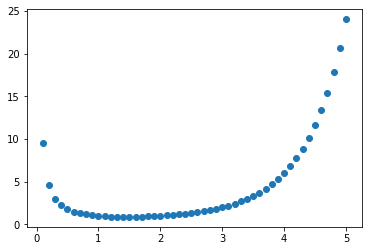

In [3]:
x = np.linspace(0.1, 5)
plt.scatter(x, gamma(x))

# normarl distribution => chi2 distribution

In [4]:
df = 10

### visualization of chi2

In [5]:
from scipy.stats import chi2

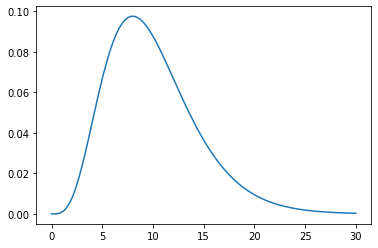

In [6]:
x = np.linspace(0, 30, 100)
y = chi2.pdf(x=x, df=df)
plt.plot(x, y)

### generate normal dists

In [7]:
def squared_sum(lis):
    return sum([x**2 for x in lis])

In [8]:
X = [np.random.standard_normal(df) for _ in range(1000)]
dists = [squared_sum(x) for x in X]

(array([0.0224391 , 0.06624878, 0.09937317, 0.07479701, 0.05342643,
        0.02279528, 0.00890441, 0.00463029, 0.00284941, 0.00071235]),
 array([ 1.47453269,  4.2821317 ,  7.08973071,  9.89732972, 12.70492873,
        15.51252774, 18.32012675, 21.12772576, 23.93532478, 26.74292379,
        29.5505228 ]),
 <a list of 10 Patch objects>)

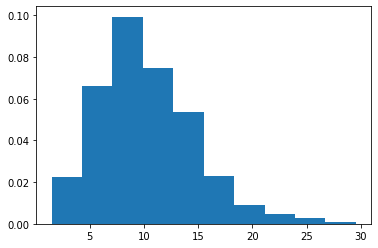

In [9]:
plt.hist(dists, density=True)

### compare

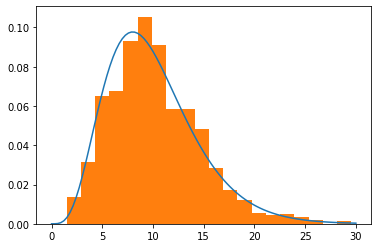

In [10]:
x = np.linspace(0, 30, 100)
y = chi2.pdf(x=x, df=df)
plt.plot(x, y)
plt.hist(dists, density=True, bins=20)
plt.show()

---

# chi2 distribution => F distribution

In [11]:
k1, k2 = 5, 6

### visualization of F distribution

In [12]:
from scipy.stats import f

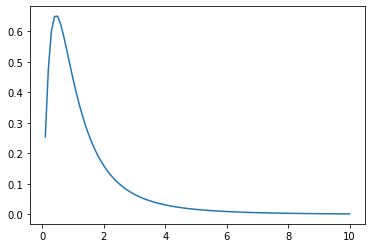

In [13]:
x = np.linspace(0.1,10,100)
plt.plot(x, f.pdf(x, dfn=k1, dfd=k2))

### generate F distribution

In [14]:
sample_size = 1000
dists = [ (x1/k1)/(x2/k2) for x1,x2 in zip(np.random.chisquare(k1, sample_size), np.random.chisquare(k2, sample_size))]

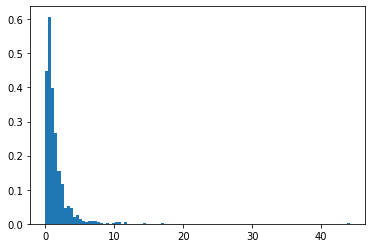

In [15]:
plt.hist(dists, density=True, bins=100)
plt.show()

### compare

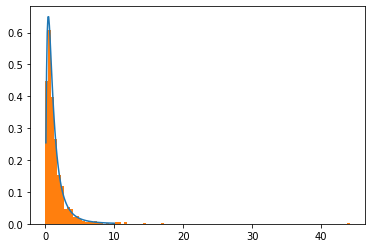

In [16]:
plt.plot(x, f.pdf(x, dfn=5, dfd=6))
plt.hist(dists, density=True, bins=100)
plt.show()

# T score => F score

In [17]:
from scipy.stats import t

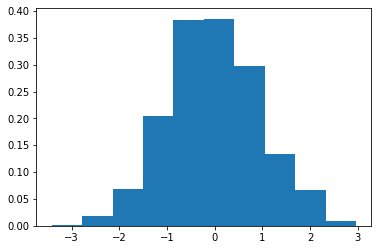

In [18]:
population = np.random.normal(size = 1000)
plt.hist(population, density=True)
plt.show()

In [19]:
sample_size = 30
sample1, sample2 = [np.random.choice(population, sample_size) for _ in range(2)]

### calculate T score

In [20]:
from math import sqrt

In [21]:
mean_diff = sample1.mean() - sample2.mean()

In [22]:
s = sqrt((sample1.var()*sample_size + sample2.var()*sample_size)/(sample_size*2-2))

In [23]:
denominator = s*sqrt(1/sample_size + 1/sample_size)

In [24]:
T = mean_diff/denominator

In [25]:
T

0.13979568855181984

In [26]:
from scipy.stats import ttest_ind

In [27]:
# compared with the t score from package
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.1397956885518198, pvalue=0.8893057461951129)

### calculte F score

In [28]:
T**2

0.01954283453767741

In [29]:
mean_all = np.concatenate([sample1,sample2]).mean()
s1 = ((sample1.mean()-mean_all)**2*sample_size + (sample2.mean()-mean_all)**2*sample_size)/(2-1)
s2 = (sample1.var()*sample_size+sample2.var()*sample_size)/(sample_size*2-2)

In [30]:
s1/s2

0.019542834537677405

In [31]:
from scipy.stats import f_oneway

In [32]:
f_oneway(sample1, sample2)

F_onewayResult(statistic=0.019542834537677415, pvalue=0.8893057461951202)